In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X =  iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.float64)

In [2]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [3]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

m = X.shape[0]
C = 1
# slower, but allowing online learning
svm_clf = SGDClassifier(loss="hinge", alpha=1/(m*C))

# or 
svm_clf = SVC(kernel="linear", C=1)

In [4]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=200, noise=0.15)
poly_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

poly_svm_clf.fit(X, y)

/opt/homebrew/Caskroom/miniforge/base/envs/ML/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

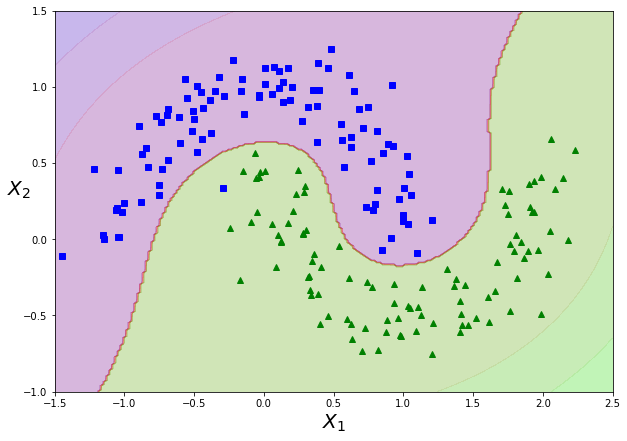

In [5]:
import matplotlib.pyplot as plt

def plot_pred(clf, axes, quality=200):
    x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], quality),
        np.linspace(axes[2], axes[3], quality)
    )
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_dec = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_dec, cmap=plt.cm.brg, alpha=0.1)
def plot_dataset(X, y):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^")
    plt.xlabel(r"$X_1$", fontsize=20)
    plt.ylabel(r"$X_2$", fontsize=20, rotation=0)

plt.figure(figsize=(10, 7))
plot_dataset(X, y)
plot_pred(poly_svm_clf, [-1.5, 2.5, -1, 1.5])
plt.show()


In [6]:
from sklearn.svm import SVC

# coef0 - how much the model is affected by high-degree features in comprashion to low-degree one
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

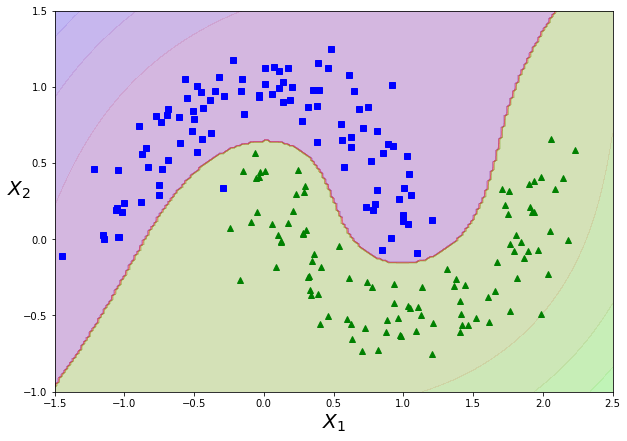

In [7]:
plt.figure(figsize=(10, 7))
plot_dataset(X, y)
plot_pred(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plt.show()

In [8]:
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

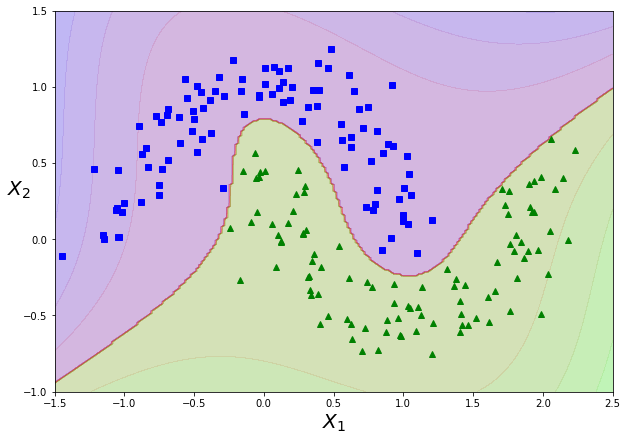

In [9]:
plt.figure(figsize=(10, 7))
plot_dataset(X, y)
plot_pred(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plt.show()

In [10]:
# higher gamma - bell-shaped curve of rbf narrwer - each instance's range of influence is smaller - decision boundary more irregular (overfitting - reduce, underfitting - increase )
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

In [11]:
# regression

from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

In [12]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

# Exerices

In [13]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris["data"][:, (2, 3)] # petal lendth, width
y = iris["target"]

In [14]:
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [15]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier

prep_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

X = prep_pipeline.fit_transform(X)

In [16]:
from sklearn.model_selection import GridSearchCV

param1 = {
    "C": [1, 2, 3, 5, 10, 25, 50, 100],
}
param2 = {
    "C": [1, 2, 3, 5, 10, 25, 50, 100],
    "kernel": ["linear", "rbf"]
}
param3 = {
    "penalty": ["l1", "elasticnet"],
    "alpha": [0.0001, 0.0005, 0.001]
}


lin_clf = LinearSVC()
svm_clf = SVC()
grd_clf = SGDClassifier(learning_rate="constant", early_stopping=True)
g1 = GridSearchCV(lin_clf, param1, n_jobs=-1, cv=5)
g2 = GridSearchCV(svm_clf, param2, n_jobs=-1, cv=5)
g3 = GridSearchCV(grd_clf, param2, n_jobs=-1, cv=5)

for idx, grid in enumerate((g1, g2, g3)):
    grid.fit(X, y)
    print(f"Grid num {idx + 1} - {grid.best_score_}")


Grid num 1 - 1.0
Grid num 2 - 1.0


In [ ]:
for name, grid in (("LinearSVC", g1), ("SVC", g2), ("SGDClassifier", g3)):
    print(name, grid.best_estimator_.intercept_, grid.best_estimator_.coef_)